# Quantum walk search on a hypercube

***Note:*** This implementation is adapted from the quantum walk models available at: https://github.com/hiperwalk/hiperwalk/tree/master/examples/coined

In [1]:
import hiperwalk as hpw
import numpy as np
import matplotlib.pyplot as plt

Consider quantum walk search on a 5-dimensional hypercube.

In [2]:
dimension = 5
g = hpw.Hypercube(dimension)
sim_steps = list(range(101))

***Case 1***: One marked vertex, uniform initial state

In [3]:
qw_single = hpw.Coined(g, coin='G', marked={'-G': [0]})
init_state_uniform = qw_single.uniform_state()

success_probs_single = []
for t in sim_steps:
    states = qw_single.simulate((t, t, 1), initial_state=init_state_uniform)
    prob = qw_single.success_probability(states[0])
    success_probs_single.append(prob)

/opt/conda/lib/python3.11/site-packages/hiperwalk/quantum_walk/_pyneblina_interface.py:217: UserWarning: Real multiplication not implemented. Treating entries as complex.
  warn(
/opt/conda/lib/python3.11/site-packages/hiperwalk/quantum_walk/_pyneblina_interface.py:70: UserWarning: Real multiplication not implemented. Treating entries as complex.
  warn(


***Case 2***: Three marked vertices, uniform initial state

In [4]:
marked_vertices_three = [0, 1, 2]
qw_three = hpw.Coined(g, coin='G', marked={'-G': marked_vertices_three})
init_state_uniform_three = qw_three.uniform_state()

success_probs_three = []
for t in sim_steps:
    states = qw_three.simulate((t, t, 1), initial_state=init_state_uniform_three)
    prob = qw_three.success_probability(states[0])
    success_probs_three.append(prob)

***Case 3***: Five marked vertices, uniform initial state

In [5]:
marked_vertices_five = [0, 1, 2, 3, 4] 
qw_five = hpw.Coined(g, coin='G', marked={'-G': marked_vertices_five})
init_state_uniform_five = qw_five.uniform_state()

success_probs_five = []
for t in sim_steps:
    states = qw_five.simulate((t, t, 1), initial_state=init_state_uniform_five)
    prob = qw_five.success_probability(states[0])
    success_probs_five.append(prob)

## Probability of measurement at solution vs. time

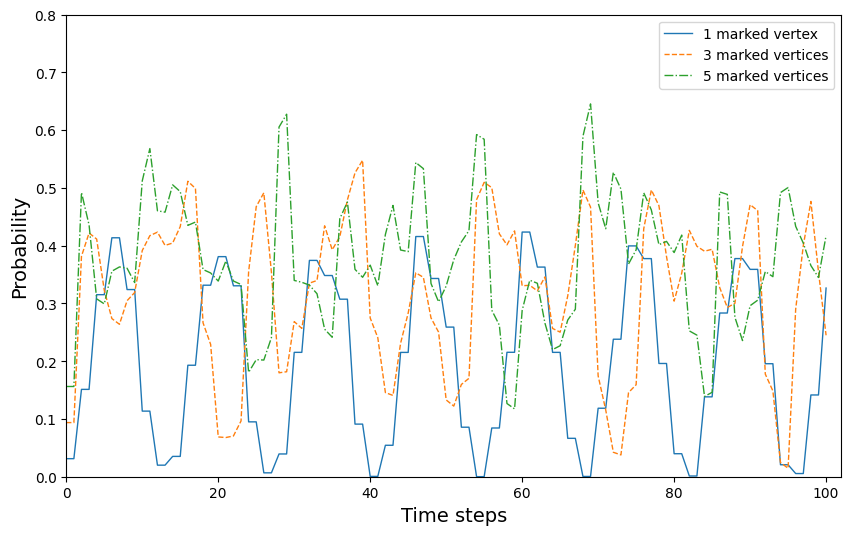

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(sim_steps, success_probs_single, lw=1, linestyle="-", label="1 marked vertex")
plt.plot(sim_steps, success_probs_three, lw=1, linestyle="--", label="3 marked vertices")
plt.plot(sim_steps, success_probs_five, lw=1, linestyle="-.", label="5 marked vertices")
plt.xlabel("Time steps", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.ylim(0, 0.8)
plt.xlim(0, 102)
plt.legend()
plt.savefig("qw_search_various_marked.png", dpi=300)
plt.show()